In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($filterTypes_0:[SecurityTypeEnum!]!,$limit_1:[SecurityLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenSecurities25Yc4F:screenSecurities(filterTypes:$filterTypes_0,filterCategory:[],limit:$limit_1,first:100) {edges {node {symbol}}}}'
variables = {'filterTypes_0': ['EQUITY'], 'limit_1':[{'type':'MARKET_CAP','min':72000000000,'inclusive':True},{'type':'DIVIDEND_YIELD','min':.6,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
symbols = [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['_screenSecurities25Yc4F']['edges']]

In [2]:
quote = Quote(symbols, 60)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-05-02 to 2019-07-01 - 97'

In [3]:
# quote.drop_mask()
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 6) & (stat['21-shrp'] > 1)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
PFE,21,4.280765,1.069132,3.848075,1.968784
NVS,21,8.370413,2.221164,3.693445,2.730451
LIN,21,10.131093,2.818439,3.535441,4.205352
LMT,21,5.494780,1.514182,3.518806,3.150072
KO,21,5.432264,1.544731,3.408747,2.709361
MDT,21,8.938665,2.728492,3.214962,3.128119
MCD,21,3.386885,1.113822,2.891142,2.034258
MRK,21,5.783577,2.103839,2.669839,3.537502
WMT,21,7.031464,2.576528,2.664359,2.333810


In [18]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, sr=.2)

['PFE'] 0.7841419502107109 0.8 0.3937568614029182 3.848074555961037
['PFE', 'NVS'] 0.11902649616418637 0.40325489187642294 0.4699235676466538 3.7707598167944516
['PFE', 'LMT'] -0.28567435231715477 -0.060871929513850564 0.5118856681343606 3.683440454688324
['NVS', 'LMT'] -0.435566145491439 -0.3023933767651876 0.5880523743780963 3.6061257155217383
['LMT', 'MDT'] -0.46780934362932625 -0.42225168590975004 0.6278191783195244 3.3668841801955027


['LMT', 'MDT']

In [23]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 10, ['LMT', 'MDT', 'MCD', 'NEE', 'UL', 'BHP', 'DEO', 'UN'], sr=0)

['LMT', 'MDT', 'MCD', 'NEE', 'UL', 'BHP', 'DEO', 'UN'] -1.7449206164263071 0.1036520364989992 0.551427347074694 2.298485892533577
['LMT', 'MDT', 'MCD', 'NEE', 'UL', 'BHP', 'DEO', 'UN', 'PFE'] -2.109320168476981 0.15677142730074475 0.5339084042222745 2.4706624106921837
['LMT', 'MDT', 'MCD', 'NEE', 'UL', 'BHP', 'DEO', 'UN', 'PFE', 'NVS'] -2.4806134111914426 0.1842599976194713 0.535126591189086 2.5929406773857524
['LMT', 'MDT', 'MCD', 'NEE', 'UL', 'BHP', 'DEO', 'UN', 'PFE', 'WMT'] -2.4894471993555527 0.1833590437824099 0.5271937568620375 2.490032114272127
['LMT', 'MDT', 'MCD', 'NEE', 'UL', 'BHP', 'DEO', 'UN', 'PFE', 'DIS'] -2.4986824990856684 0.16279266514703403 0.538524835767298 2.384802479143495
['LMT', 'MDT', 'MCD', 'NEE', 'UL', 'BHP', 'DEO', 'UN', 'CME', 'DIS'] -2.503603465071836 0.08749254428906389 0.6089039906391 2.2067456673858223


['LMT', 'MDT', 'MCD', 'NEE', 'UL', 'BHP', 'DEO', 'UN', 'CME', 'DIS']

In [30]:
quote.setup_mask(['LMT', 'MDT', 'MCD', 'BHP', 'CME'])
quote.find_optimal_ratio(21, .88)

({'LMT': 0.16, 'MDT': 0.04, 'MCD': 0.24, 'BHP': 0.19, 'CME': 0.25},
 5.3391,
 0.5634,
 9.1803)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,21.0,5.709249,0.652868,4.694879,5.112656,5.685236,6.225074,7.066381,8.489590,1.043448
LMT,21.0,5.494780,1.514182,1.440667,4.512693,5.738054,6.773200,7.223517,3.518806,3.150072
MDT,21.0,8.938665,2.728492,4.700474,6.472461,9.112360,11.225184,13.091040,3.214962,3.128119
MCD,21.0,3.386885,1.113822,1.207650,2.740915,3.256524,4.050032,5.845301,2.891142,2.034258
NEE,21.0,5.055528,2.253014,1.582752,3.584627,4.416767,5.990333,9.475382,2.169920,2.463972
CME,21.0,7.943676,3.761540,1.287900,6.618606,6.965240,11.689807,13.829748,2.067506,5.487742
UL,21.0,2.610746,1.288919,0.453887,1.713451,2.825511,3.627892,4.920500,1.896225,2.359091
BHP,21.0,6.748406,3.725473,0.378710,3.654035,8.153992,9.075277,12.579462,1.766685,4.090134
DIS,21.0,3.866056,2.294817,-1.244967,2.604994,4.766522,5.627839,7.278098,1.612063,2.900364
DEO,21.0,1.780188,1.006110,-0.516265,1.511620,1.894341,2.143281,3.904993,1.603721,2.233835


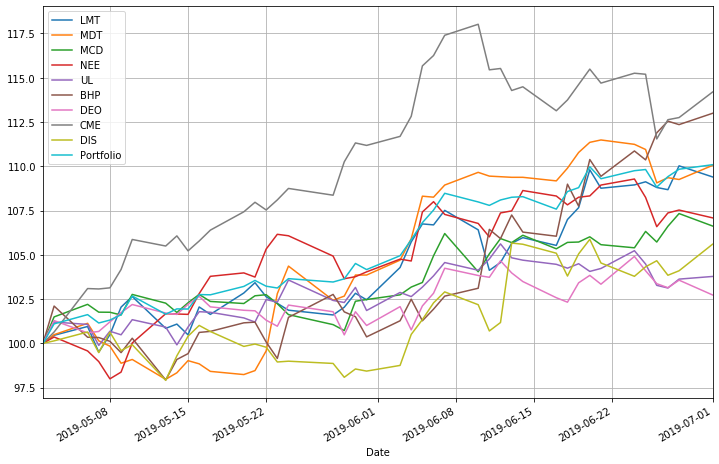

In [31]:
%pylab inline
quote.setup_mask(['LMT', 'MDT', 'MCD', 'NEE', 'UL', 'BHP', 'DEO', 'CME', 'DIS'])
quote.graph(21, {'DEO': .03, 'UL': .03, 'DIS': .03, 'NEE': .03, 'LMT': 0.16, 'MDT': 0.04, 'MCD': 0.24, 'BHP': 0.19, 'CME': 0.25})